---
---
# **SERIES DE TIEMPO**

Docente: Paulette N. Reyes Baeza

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github](https://github.com/paulette-reyes)

---
---
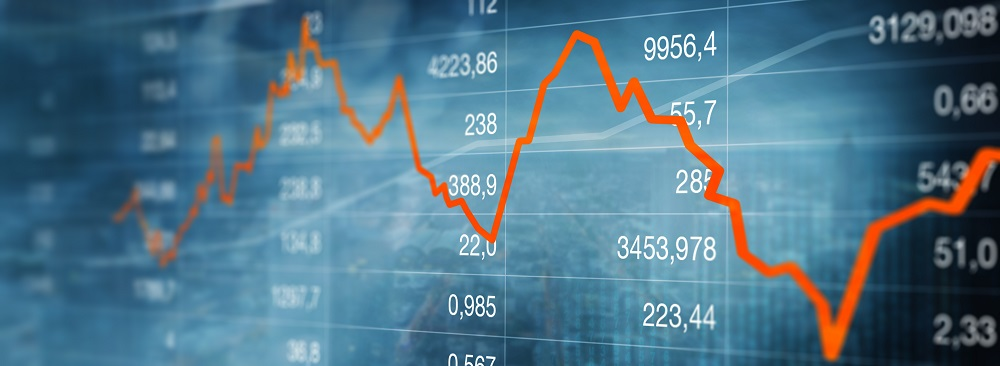

# **1. ANÁLISIS EXPLORATORIO**
---

El análisis exploratorio de datos es una forma de entender, visualizar y extraer información relevante del set de datos para poder decidir cuál será la ruta o técnica más adecuada para su posterior procesamiento. El principal propósito del análisis exploratorio es tener una idea completa de cómo son los datos, antes de decidir qué técnica de modelamiento utilizar.

## **1.1. Carga de datos**

In [1]:
# Importar librerías básicas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from seaborn import boxplot

🟠 **JUPYTER NOTEBOOK** 🟠

**Opción 1:** Abrir el archivo desde la misma carpeta donde se encuentra el notebook de Jupyter. (Advertencia: El archivo no se subirá si está en otra carpeta diferente)

In [2]:
df = pd.read_csv("Microsoft_Stock.csv")

**Opción 2:** Abrir el archivo desde su ubicación original utilizando la ruta completa del directorio.

In [3]:
# df = pd.read_csv("C:/Users/Mis Documentos/Microsoft_Stock.csv")


---



🟠 **GOOGLE COLABORATORY** 🟠

**Opción 1:** Subir el archivo a Colab directamente en la carpeta "Archivos". (Advertencia: El archivo se elimina luego que se desconecta el entorno de ejecución por lo que no es recomendable para tareas que requieren mucho tiempo de trabajo)

In [4]:
# df = pd.read_csv("Microsoft_Stock.csv")

**Opción 2:** Abrir un archivo local desde el computador

In [5]:
# from google.colab import files
# uploaded = files.upload()

# for fn in uploaded.keys():
#     name=fn
# df = pd.read_csv(name)

**Opción 3:** Importar desde Google Drive

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv("/content/drive/My Drive/Microsoft_Stock.csv")


---


In [7]:
# Resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [8]:
#Primeros registros
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [9]:
#Ultimos registros
df.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


## **1.2. Preprocesamiento**

In [10]:
# Datos faltantes
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
# Datos duplicados
df.duplicated().sum()

np.int64(0)

In [12]:
# Convertir la columna de fecha a formato datetime
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
# Establecer fecha como índice del df
df.set_index("Date", inplace=True)

In [14]:
# Corroborar cambio de índice
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


## **1.3. Análisis Estadístico**

In [15]:
# Establecer el formato de punto flotante a 2 decimales
pd.options.display.float_format = '{:.2f}'.format

In [16]:
# Resumen estadistico
df.describe()

,Open,High,Low,Close,Volume
count,1511.00,1511.00,1511.00,1511.00,1511.00
mean,107.39,108.44,106.29,107.42,30198625.08
std,56.69,57.38,55.98,56.70,14252659.09
min,40.34,40.74,39.72,40.29,101612.00
25%,57.86,58.06,57.42,57.86,21362129.00
50%,93.99,95.10,92.92,93.86,26629615.00
75%,139.44,140.32,137.82,138.97,34319615.50
max,245.03,246.13,242.92,244.99,135227059.00


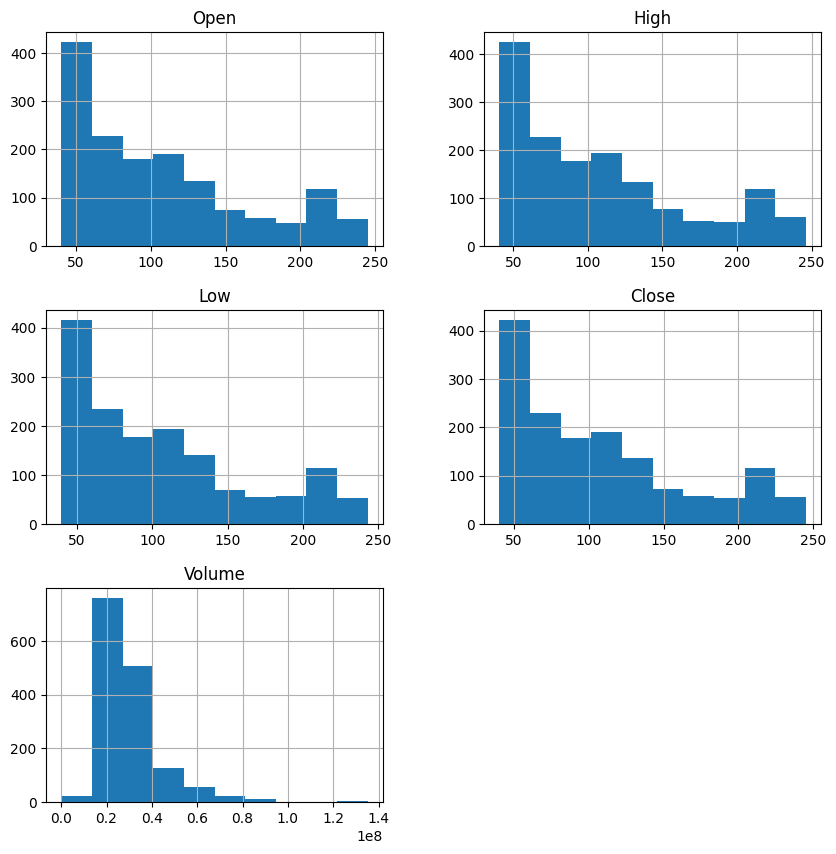

In [17]:
# Histograma
df.hist(figsize=(10, 10))
plt.show()

In [18]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

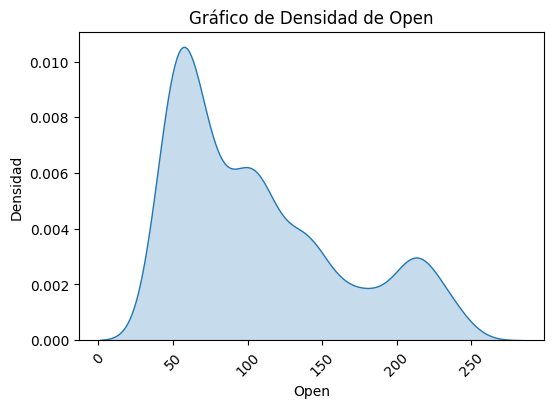

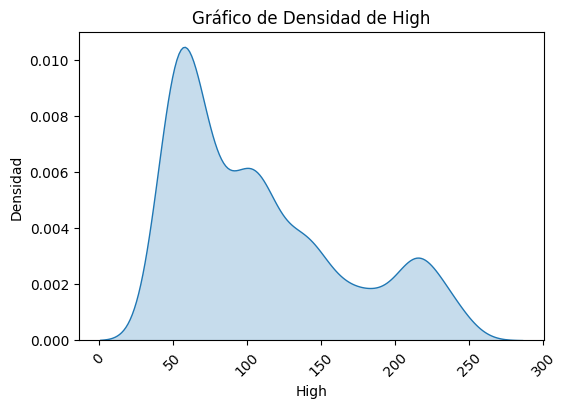

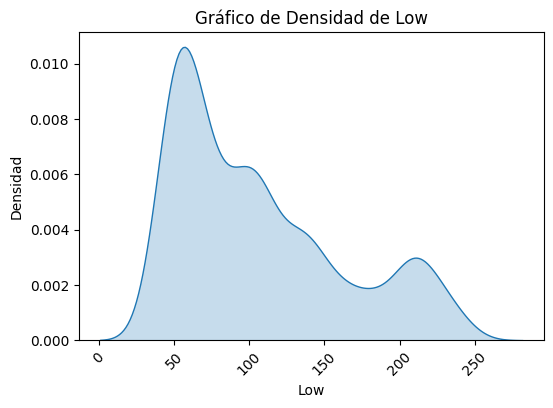

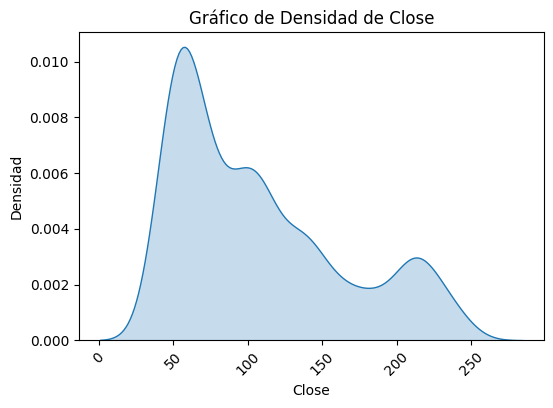

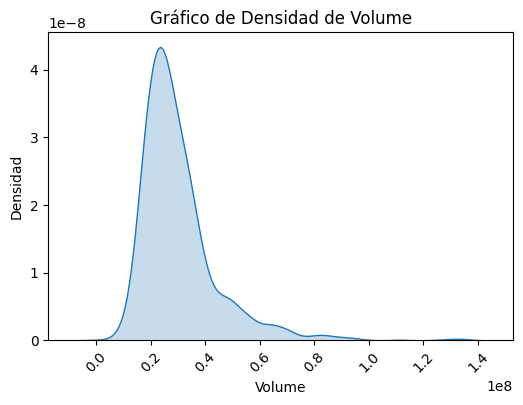

In [19]:
# Itera a través de las columnas numéricas y crea gráficos de densidad
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    sb.kdeplot(df[column], fill=True)  # Gráfico de densidad
    plt.xticks(rotation=45) # Rotar etiquetas del eje X
    plt.xlabel(column)  # Título del eje x con el nombre de la columna
    plt.ylabel("Densidad")  # Título del eje Y
    plt.title(f"Gráfico de Densidad de {column}")  # Título del gráfico
    plt.show()  # Mostrar el gráfico

Todas las series tienen una **distribución asimétrica con sesgo positivo**. Esto implica que hay más valores concentrados en la parte baja del rango de precios, mientras que algunos valores inusualmente altos "arrastran" la media hacia arriba, por lo que los precios tienen más probabilidad de estar por debajo de la media que por encima.

Además, las series son **leptocúrticas** (alta curtosis). Esto implica que los precios tienen una mayor probabilidad de experimentar cambios extremos (altas subidas o caídas). Esto podría reflejar alta volatilidad en los datos, lo cual es típico de los mercados financieros.

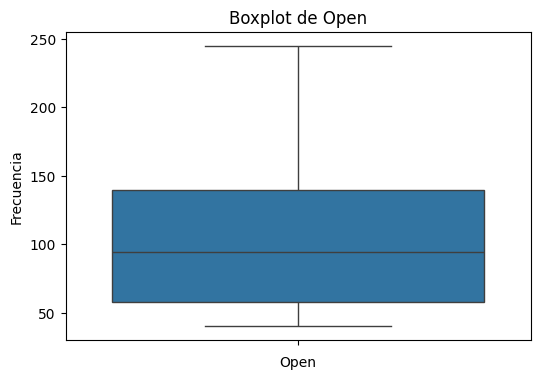

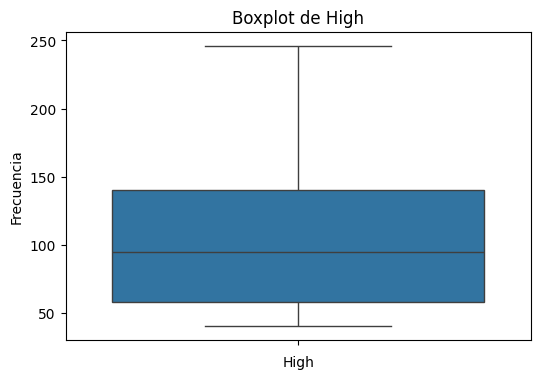

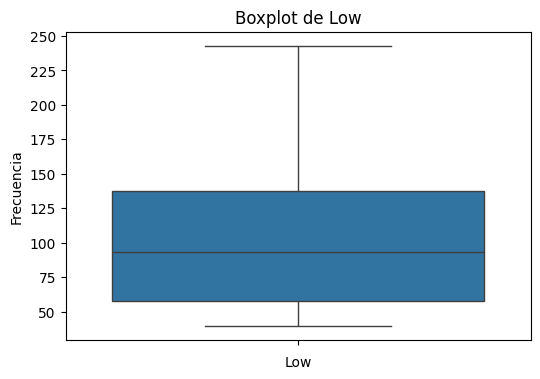

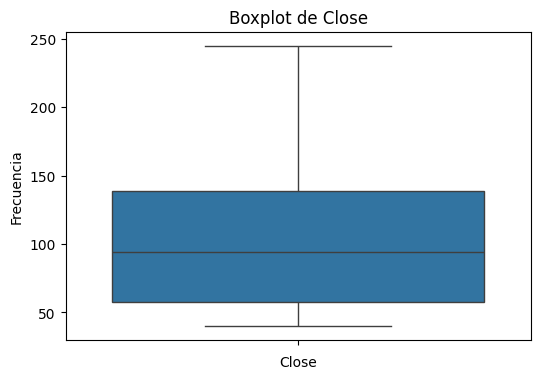

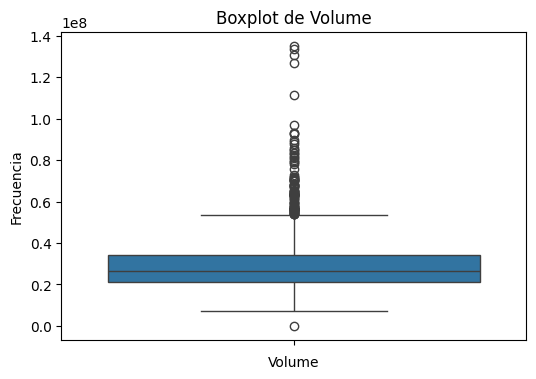

In [20]:
# Itera a través de las columnas numéricas y crea gráficos de boxplot
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    boxplot(df[column])  # Gráfico de densidad
    plt.xlabel(column)  # Título del eje x con el nombre de la columna
    plt.ylabel("Frecuencia")  # Título del eje Y
    plt.title(f"Boxplot de {column}")  # Título del gráfico
    plt.show()  # Mostrar el gráfico

La serie Volume presenta **datos atípicos (outliers)** en el extremo superior. Esto implica que, en algunos días, se negociaron volúmenes de acciones inusualmente altos en comparación con el comportamiento general.

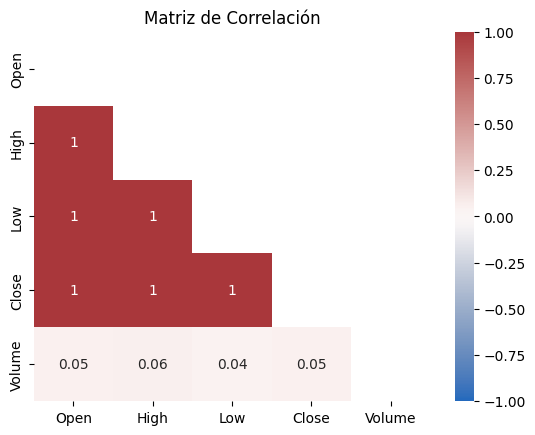

In [21]:
# Correlacion entre series
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sb.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Matriz de Correlación')
plt.show()

Las series Open, Low, High y Close están **perfectamente correlacionadas** ya que explican el comportamiento de la misma variable (el precio de la acción).

Se considerará como variable objetivo la serie Close ya que corresponde al precio final de la acción.

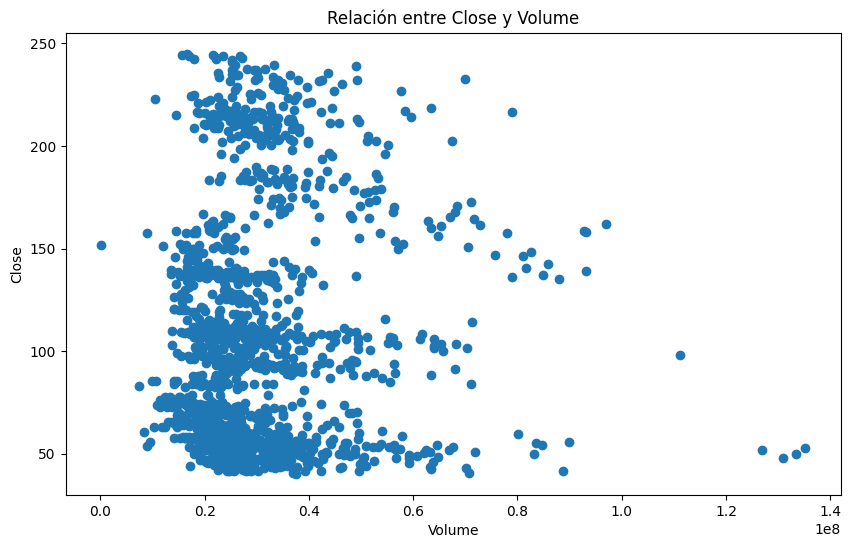

In [22]:
# Gráfico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(df['Volume'], df['Close'])
plt.title('Relación entre Close y Volume')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

No hay una correlación aparente entre las seies Volume y Close.

<Figure size 640x480 with 0 Axes>

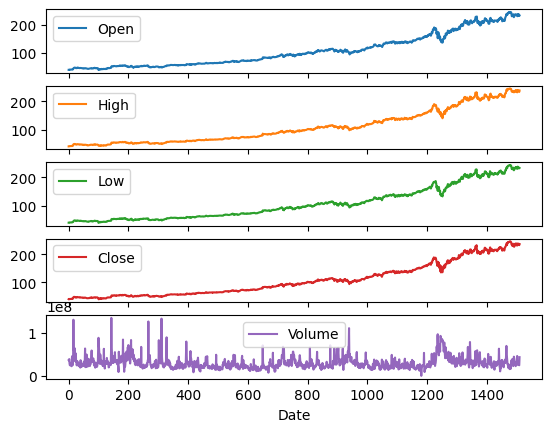

In [23]:
# Series de tiempo
plt.figure()
df.plot(subplots=True, use_index=False)
plt.xlabel('Date')
plt.show()

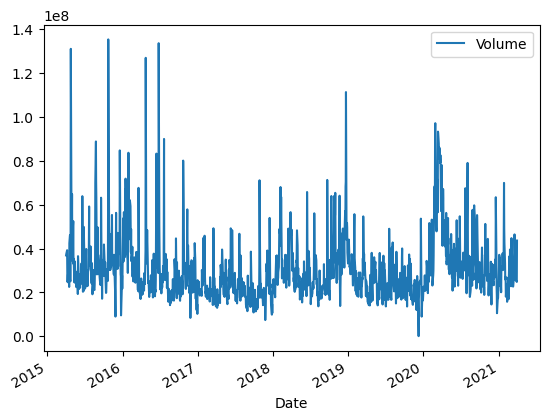

In [24]:
# Serie de tiempo
df.plot(y="Volume")
plt.show()

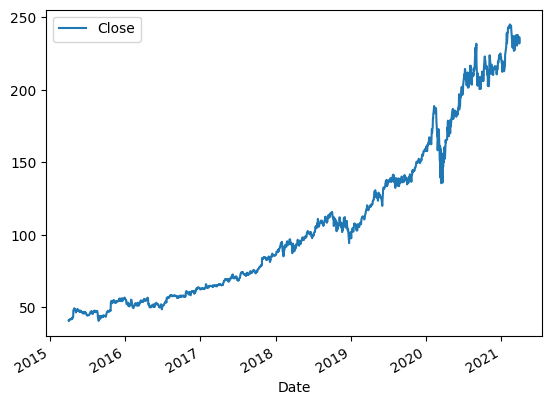

In [25]:
# Serie de tiempo
df.plot(y="Close")
plt.show()

## **1.4. Autocovarianza**

La autocovarianza es una medida de la covariación entre las observaciones de la serie consigo misma en diferentes momentos del tiempo.

coeficiente = 0 ➞ no hay corelación

coeficiente > 0 ➞ correlacón directa

coeficiente = 1 ➞ correlación perfecta directa

coeficiente < 0 ➞ correlación inversa

coeficiente = -1 ➞ correlación perfecta invesa


In [26]:
#Calcular la varianza de la serie de tiempo
varianza = df['Close'].var()
print(varianza)

3215.1506791996003


In [27]:
#Calcular la autocovarianza con lag de 1
autocovarianza_lag1 = df['Close'].cov(df['Close'].shift(1))
#Calcular la autocovarianza con lag de 7
autocovarianza_lag7 = df['Close'].cov(df['Close'].shift(7))
#Calcular la autocovarianza con lag de 30
autocovarianza_lag30 = df['Close'].cov(df['Close'].shift(30))
print("Autocovarianza:")
print("Autocovarianza con 1 rezago: ",round(autocovarianza_lag1,4))
print("Autocovarianza con 7 rezagos: ", round(autocovarianza_lag7,4))
print("Autocovarianza con 30 rezagos: ", round(autocovarianza_lag30,4))

Autocovarianza:
Autocovarianza con 1 rezago:  3207.5678
Autocovarianza con 7 rezagos:  3170.0382
Autocovarianza con 30 rezagos:  3038.8249


In [28]:
print("Comparación con la varianza:")
print("Autocovarianza con 1 rezago:", round(autocovarianza_lag1 / varianza,4))
print("Autocovarianza con 7 rezagos:", round(autocovarianza_lag7 / varianza,4))
print("Autocovarianza con 30 rezagos:", round(autocovarianza_lag30 / varianza,4))

Comparación con la varianza:
Autocovarianza con 1 rezago: 0.9976
Autocovarianza con 7 rezagos: 0.986
Autocovarianza con 30 rezagos: 0.9452


Resultados cercanos a 1 significa que la autocovarianza es del mismo orden de magnitud que la varianza.
Cuando la autocovarianza es cercana a 1 en relación con la varianza, indica una fuerte relación lineal entre los valores de la serie de tiempo y sus valores rezagados en el tiempo. En este caso, parece que la serie de tiempo exhibe una autocorrelación significativa en varios rezagos, lo que puede indicar la presencia de un patrón temporal en los datos.

La autocovarianza es alta en los primeros rezagos, lo que implica que la serie de tiempo tiene una dependencia temporal significativa. Es decir, el valor de un día tiene una fuerte relación con los valores previos, y esa relación sigue siendo relevante incluso a lo largo de varias semanas (30 rezagos).

A medida que aumenta el rezago (hasta 30 días), la relación se debilita, lo que es normal en muchas series financieras, ya que los efectos inmediatos de los precios anteriores suelen ser más relevantes que los efectos de hace más tiempo. Sin embargo, el valor aún se mantiene bastante fuerte a 30 días, lo que sugiere una persistencia considerable en los precios a lo largo de un mes.

## **1.5. Autocorrelación**

La autocorrelación indica la fuerza y la dirección de la relación lineal entre los valores de la serie de tiempo en el tiempo actual y los valores de un periodo de tiempo anterior (rezago).


coeficiente = 0 ➞ no hay corelación

coeficiente > 0 ➞ correlacón directa

coeficiente = 1 ➞ correlación perfecta directa

coeficiente < 0 ➞ correlación inversa

coeficiente = -1 ➞ correlación perfecta invesa


In [29]:
autocorrelation_lag1 = df['Close'].autocorr(lag=1)
print("Autocorrelación con 1 rezago: ", round(autocorrelation_lag1,4))

autocorrelation_lag7 = df['Close'].autocorr(lag=7)
print("Autocorrelación con 7 rezagos: ", round(autocorrelation_lag7,4))

autocorrelation_lag30 = df['Close'].autocorr(lag=30)
print("Autocorrelación con 30 rezagos: ", round(autocorrelation_lag30,4))

Autocorrelación con 1 rezago:  0.9991
Autocorrelación con 7 rezagos:  0.9963
Autocorrelación con 30 rezagos:  0.9896


Un valor cercano a 1 sugiere una fuerte autocorrelación positiva, lo que significa que los valores de la serie de tiempo están altamente correlacionados con sus valores en el período anterior.

La alta autocorrelación sugiere que la serie de tiempo tiene un comportamiento persistente, es decir, lo que ocurre en el pasado cercano (y no tan cercano) tiene una gran influencia en el comportamiento futuro. Esto es común en series financieras, donde el precio de un activo tiende a seguir un patrón o tendencia de corto y mediano plazo.

**GRÁFICOS DE AUTOCORRELACIÓN**

Los gráficos de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) son herramientas que ayudan a comprender la estructura de autocorrelación en una serie de tiempo y pueden proporcionar información útil para seleccionar modelos apropiados para el análisis y la predicción de series temporales.

1. **Función de Autocorrelación (ACF):** La ACF muestra la autocorrelación de una serie de tiempo con sus valores rezagados (conocidos como "lags").
En el eje x (horizontal) se encuentran los lags, que representan los períodos de tiempo anteriores.
En el eje y (vertical) se muestra el valor de la autocorrelación en cada lag.
Los puntos dentro de las bandas sombreadas indican valores de autocorrelación estadísticamente significativos, es decir, aquellos que están fuera de los límites establecidos por las bandas de confianza (determinadas por el parámetro alpha). *Interpretación:* Si la autocorrelación en un lag es significativamente diferente de cero (especialmente si está cerca de 1), indica una correlación lineal entre los valores de la serie de tiempo en ese lag y los valores actuales.
Si la autocorrelación disminuye gradualmente a medida que aumenta el lag y eventualmente se vuelve no significativa, sugiere que la serie de tiempo puede ser estacionaria.

2. **Función de Autocorrelación Parcial (PACF):** La PACF muestra la autocorrelación parcial de una serie de tiempo con sus valores rezagados, controlando los efectos de los rezagos intermedios.
Al igual que la ACF, en el eje x se encuentran los lags y en el eje y se muestra el valor de la autocorrelación parcial. *Interpretación:* Los valores de la PACF que son significativamente diferentes de cero indican la correlación entre los valores de la serie de tiempo en un lag particular y los valores actuales, controlando los efectos de los rezagos intermedios.

In [30]:
# Importar librería
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

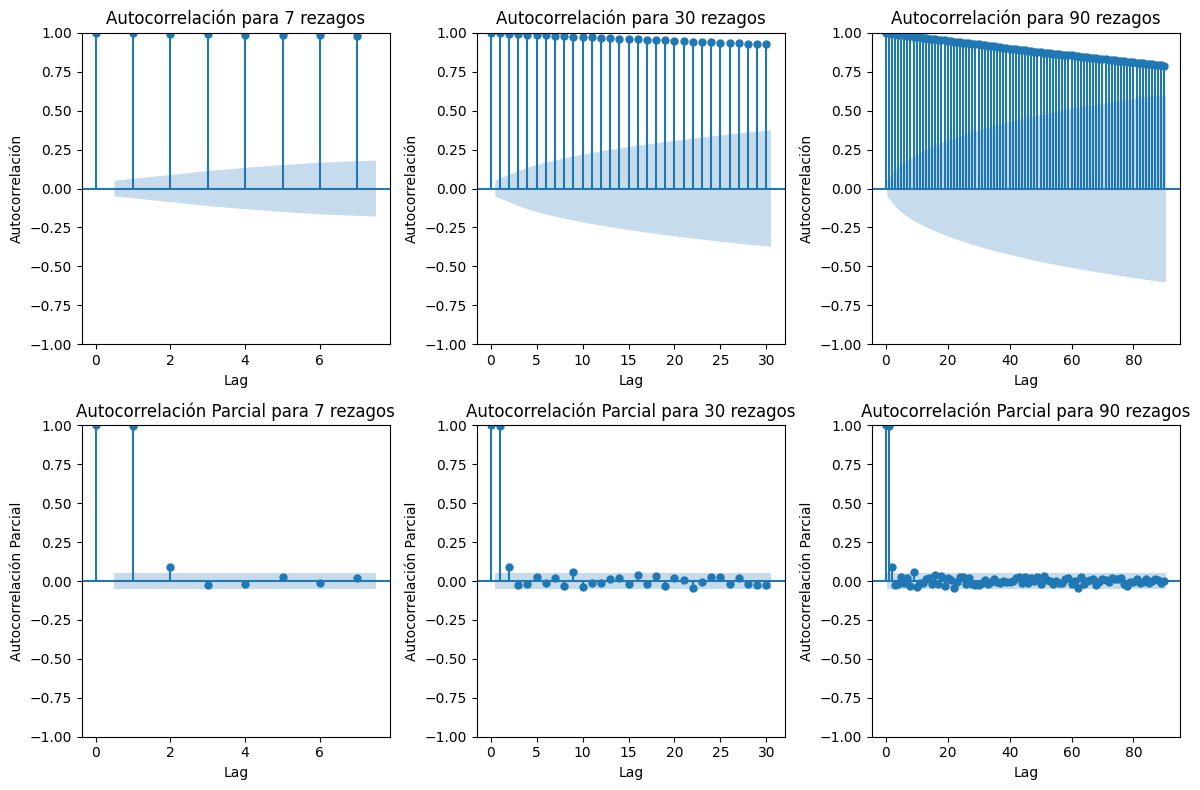

In [31]:
# Números de rezagos
lag_numbers = [7, 30, 90]

# Títulos
titles_acf = ['Autocorrelación para 7 rezagos', 'Autocorrelación para 30 rezagos', 'Autocorrelación para 90 rezagos']
titles_pacf = ['Autocorrelación Parcial para 7 rezagos', 'Autocorrelación Parcial para 30 rezagos', 'Autocorrelación Parcial para 90 rezagos']

# Configurar el número total de gráficos
num_plots = len(lag_numbers)

# Configurar el número de filas y columnas
num_rows = 2
num_cols = num_plots

# Configurar el tamaño de la figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generar los gráficos de ACF
for lag, title, ax in zip(lag_numbers, titles_acf, axes[0]):
    plot_acf(df['Close'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación')

# Generar los gráficos de PACF
for lag, title, ax in zip(lag_numbers, titles_pacf, axes[1]):
    plot_pacf(df['Close'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación Parcial')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

En el gráfico de ACF casi todos los puntos están cerca de 1 y están muy por fuera del área pintada (es decir, las bandas de confianza), esto sugiere una fuerte correlación positiva en la serie de tiempo en varios rezagos (lags). Si la autocorrelación decae rápidamente (como en el caso del rezago de 90 días), sugiere que la dependencia temporal disminuye con el tiempo. Esto puede indicar que los valores de la serie están altamente influenciados por los eventos recientes, pero esa influencia disminuye a medida que se aleja en el tiempo.

La mayoría de los puntos en el gráfico de PACF están dentro de las bandas de confianza, esto sugiere que no hay correlaciones significativas después de controlar el efecto de los lags intermedios. A medida que los rezagos aumentan (30 y 90), la autocorrelación parcial se suaviza y los peaks de los primeros rezagos tienden a ser más pequeños, lo que indica que la dependencia directa de los valores pasados sobre el valor actual se vuelve más difusa con el tiempo.

La presencia simultánea de autocorrelación significativa en ACF y falta de correlaciones significativas en PACF puede indicar problemas como falta de estacionariedad o heterocedasticidad en los datos, lo que podría requerir un enfoque diferente en el análisis y modelización de la serie de tiempo.

No es normal que se den ambos casos simultáneamente, pero en algunos procesos o fenómenos del mundo real, puede haber características particulares que conduzcan a patrones inusuales en los gráficos de autocorrelación. En el caso del precio de las acciones esto se debe a la alta volatilidad.

## **1.6. Estacionariedad**

Una Serie de Tiempo es Estacionaria cuando la manera en que cambia es constante, es decir, sin tendencias ni patrones estacionales. Se asume estacionariedad para modelos de pronóstico, por lo que es importante evaluarla antes de realizar los modelos.

Una forma sólida de calcular y mostrar la estacionariedad de una serie de tiempo es a través de dos test:La prueba de Dickey-Fuller aumentada (ADF) y la prueba de Kwiatkowski-Phillips-Schmidt-Shin (KPSS). Estas evaluaciones usan estadísticos de prueba y test de hipótesis para su evaluación.

1.   **Dickey-Fuller (ADF):** Evalúa si hay raíces unitarias en una serie temporal. Este test tiene como hipótesis nula que la serie de tiempo *no es estacionaria*.  Si el valor p es *menor* que el umbral (generalmente 0.05), se rechaza la hipótesis nula, lo que sugiere que la serie *es estacionaria*.

2.   **Kwiatkowski-Phillips-Schmidt-Shin (KPSS):** Evalúa si una serie temporal es tendenciosa estacionaria o no estacionaria. La hipótesis nula este test indica que la serie de tiempo *es estacionaria*. Si el valor p es *menor* que el umbral (generalmente 0.05), se rechaza la hipótesis nula , lo que sugiere que la serie *no es estacionaria*.


In [32]:
# Importar librerías para test de estacionariedad
from statsmodels.tsa.stattools import adfuller,kpss

In [33]:
# Definir función para calcular estacionariedad
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'No Estacionaria'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Estacionaria'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Estacionaria'
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Rezagos': lags,
    'Decisión': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [34]:
adf_output = adfuller(df['Close'])
kpss_output = kpss(df['Close'])
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
    ], axis=1)

C:\Users\gonza\AppData\Local\Temp\ipykernel_16684\2259141138.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df['Close'])


,adf,kpss
Test Statistic,1.74,5.41
p-value,1.00,0.01
Rezagos,24,25
Decisión,No Estacionaria,No Estacionaria
Critical Value (1%),-3.43,0.74
Critical Value (5%),-2.86,0.46
Critical Value (10%),-2.57,0.35
Critical Value (2.5%),NaN,0.57


Test de Dickey-Fuller Aumentado (ADF): El valor p (p-value) es 1.00 y como este es mayor que cualquier nivel de significancia típico (como 0.05), no podemos rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria.

Test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS): El valor p (p-value) es 0,01 y dado que este valor p es menor que el nivel de significancia típico (0.05), rechazamos la hipótesis nula de que la serie de tiempo es estacionaria alrededor de una tendencia determinista.

En otras palabras, hay suficiente evidencia para concluir que la serie de tiempo **no es estacionaria** según ambos test.

En modelos de series de tiempo como AR, MA y ARIMA, uno de los supuestos fundamentales es que la serie es estacionaria. Si este supuesto no se cumple, la autocovarianza puede cambiar con el tiempo, y no se podrá capturar la estructura temporal adecuadamente.

Se deben tomar medidas para transformar la serie en estacionaria, como la diferenciación o el suavizado, antes de usarla en un modelo de series de tiempo.

## **1.7. Estacionalidad**

La estacionalidad implica la presencia de patrones regulares que se repiten en intervalos específicos, como ciclos anuales o mensuales, independientemente de la tendencia a largo plazo.

**Descomposición**

Al descomponer la serie, el componente estacional revela el patrón repetitivo. Esto es útil para confirmar visualmente la periodicidad.

In [35]:
# Importar libreria para realizar descomposición de la serie
from statsmodels.tsa.api import (seasonal_decompose)

In [36]:
# Establecer formato de tamaño de gráficos
plt.rcParams["figure.figsize"] = [8, 5]

Text(0.5, 1.05, 'Descomposición de la serie en 30 días (modelo aditivo)')

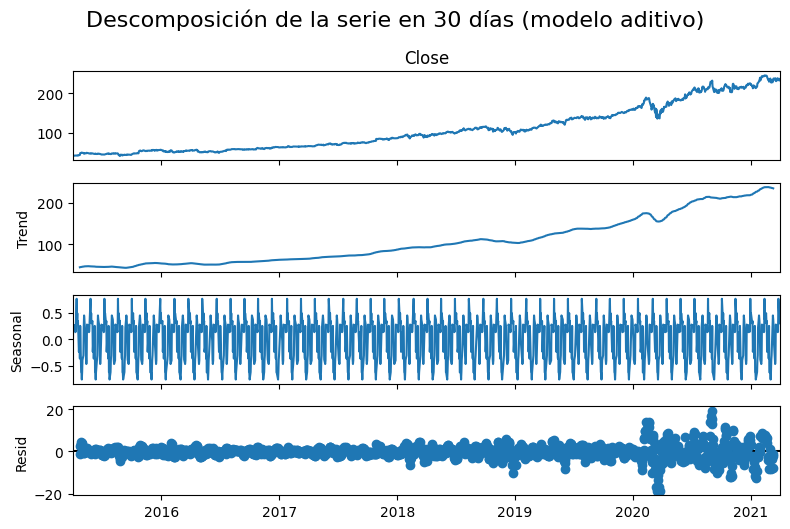

In [37]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],period=30)
sd.plot();
plt.suptitle('Descomposición de la serie en 30 días (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo aditivo)')

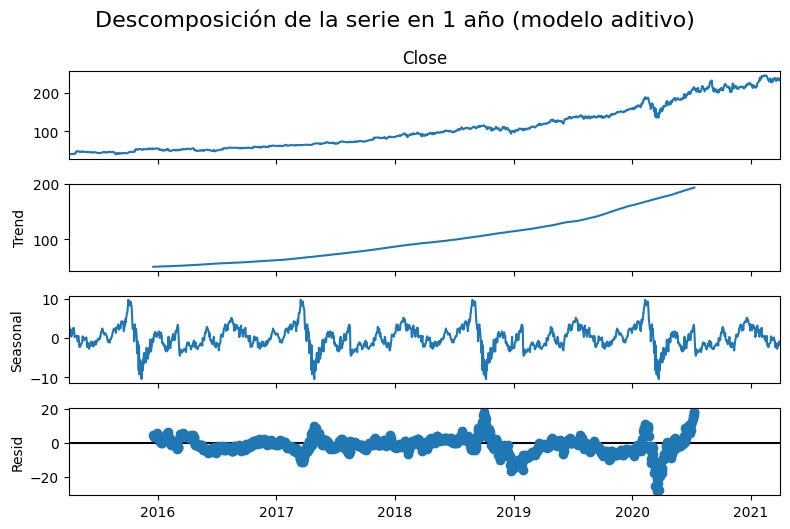

In [38]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo multiplicativo)')

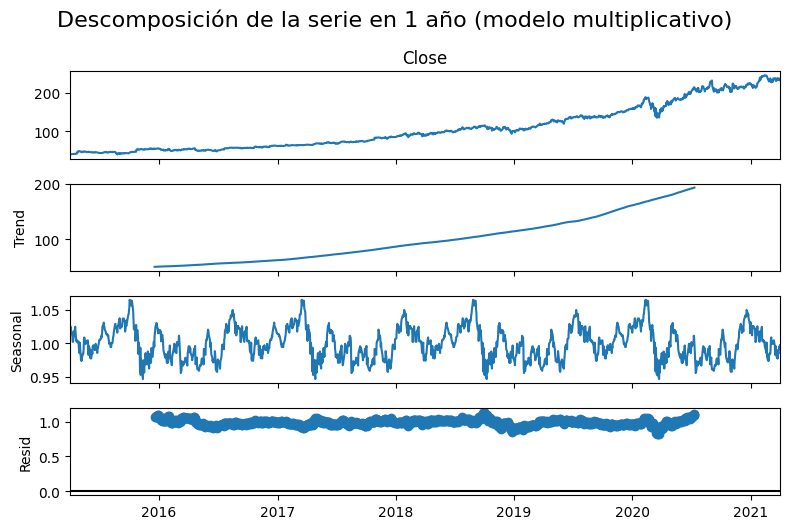

In [39]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],model="multiplicative",period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo multiplicativo)', fontsize=16, y=1.05)

**Periodograma**

El periodograma es una herramienta que muestra cómo se distribuye la variación de la serie de tiempo en función de las frecuencias, y se utiliza para identificar patrones cíclicos o estacionales.

El periodograma analiza las frecuencias dominantes en la serie, útil para series con ciclos menos evidentes.

En el periodograma, la presencia de peaks en frecuencias específicas puede indicar estacionalidad. Estos peaks corresponden a patrones repetitivos (cíclicos) en la serie de tiempo.


*   ▶ Frecuencias bajas pueden estar asociadas con tendencias a largo plazo.
*   ▶ Frecuencias más altas podrían indicar ciclos más cortos o estacionales.

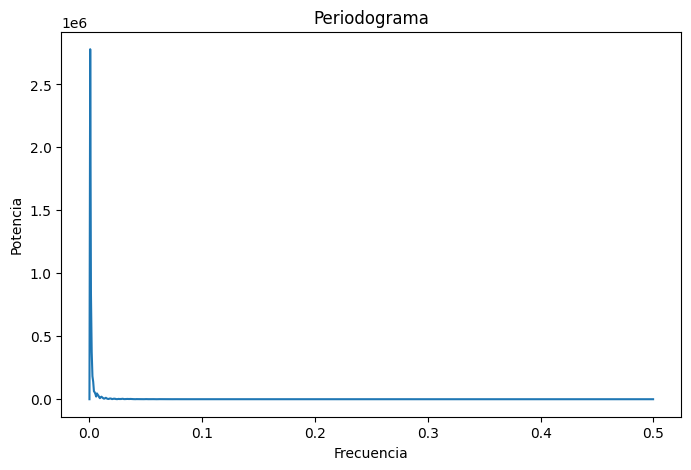

In [40]:
from scipy.signal import periodogram

frequencies, power = periodogram(df['Close'])
plt.plot(frequencies, power)
plt.title('Periodograma')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.show()

La frecuencia 0 representa la tendencia constante o de largo plazo en la serie de tiempo. Un peak alto en esta frecuencia significa que la mayor parte de la varianza en la serie de tiempo proviene de un componente de tendencia, no de fluctuaciones estacionales o cíclicas.

Un periodograma plano fuera de la frecuencia 0 indica que no hay fluctuaciones cíclicas dominantes a ninguna frecuencia específica. Esto significa que tu serie no tiene patrones estacionales evidentes.

Por lo tanto, hay señales claras de **estacionalidad** o ciclos significativos.